How many states are there?

In [9]:
def count_states(n):
    return 2**n

n = 3
states = count_states(n)
print(f"There are {states} states for n = {n}")

There are 8 states for n = 3


Draw the directed graph of the Markov chain.

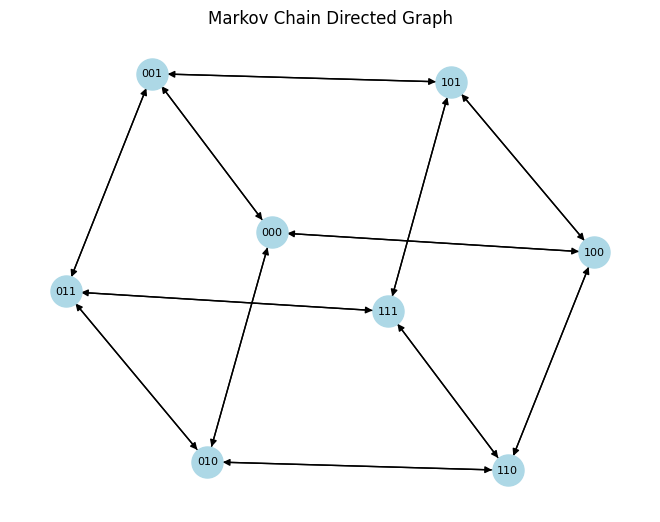

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_neighbors(state):
    neighbors = []
    for i in range(len(state)):
        new_state = list(state)
        new_state[i] = 1 - int(state[i])  # Flip the color of the ith arc
        neighbors.append("".join(map(str, new_state)))
    return neighbors

n = 3
G = nx.DiGraph()

# Create all possible states
all_states = [format(state, f'0{n}b') for state in range(2**n)]

# Add nodes (states) to the graph
G.add_nodes_from(all_states)

# Add transitions (edges) between states
for state in all_states:
    neighbors = generate_neighbors(state)
    for neighbor in neighbors:
        G.add_edge(state, neighbor)

# Plot the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_color='black')
plt.title("Markov Chain Directed Graph")
plt.show()

What are the absorbing states?

In [11]:
def is_absorbing_state(state):
    return len(set(state)) == 1

n = 3
absorbing_states = [state for state in range(count_states(n)) if is_absorbing_state(format(state, f'0{n}b'))]
print("Absorbing states:", absorbing_states)

Absorbing states: [0, 7]


Is this an absorbing Markov chain?

In [12]:
def is_absorbing_markov_chain(n):
    return len(absorbing_states) > 0

n = 3
absorbing_states = [state for state in range(count_states(n)) if is_absorbing_state(format(state, f'0{n}b'))]

if is_absorbing_markov_chain(n):
    print("This is an absorbing Markov chain.")
else:
    print("This is not an absorbing Markov chain.")

This is an absorbing Markov chain.
